In [1]:
import pandas as pd
import os 
# Specify the path to your CSV file
csv_file_path = '/home/jovyan/work/hand_history.csv'

print(os.getcwd())

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Now, 'df' contains the data from the CSV file in a DataFrame
# You can perform various operations on 'df'
print(len(df))
print(df.columns)

/home/jovyan
20000
Index(['POSITION', 'PLR_START_PREFLOP', 'PLR_START_FLOP', 'PLR_START_TURN',
       'PLR_START_RIVER', 'HND_RNK_PREFLOP', 'HND_RNK_FLOP', 'HND_RNK_TURN',
       'HND_RNK_RIVER', 'PLR_BEFORE_HERO_PREFLOP', 'PLR_BEFORE_HERO_FLOP',
       'PLR_BEFORE_HERO_TURN', 'PLR_BEFORE_HERO_RIVER', 'POT_START_FLOP',
       'POT_START_TURN', 'POT_START_RIVER', 'FINAL_POT', 'HERO_EQ_PREFLOP',
       'HERO_EQ_FLOP', 'HERO_EQ_TURN', 'HERO_EQ_RIVER', 'CALL_AMT_PREFLOP',
       'CALL_AMT_FLOP', 'CALL_AMT_TURN', 'CALL_AMT_RIVER', 'ACT_PREFLOP',
       'ACT_FLOP', 'ACT_TURN', 'ACT_RIVER', 'ACT_AMT_PREFLOP', 'ACT_AMT_FLOP',
       'ACT_AMT_TURN', 'ACT_AMT_RIVER', 'IN_SHOWDOWN', 'HERO_HAND',
       'BEST_NON_HERO_HAND', 'INIT_STACK', 'FINAL_STACK'],
      dtype='object')


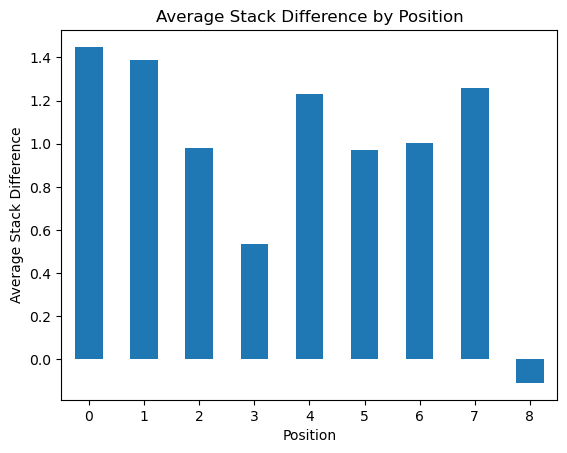

In [2]:
# Avg win/loss by position -- 0 is SB
import matplotlib.pyplot as plt
# Calculate the difference
df['STACK_DIFF'] = df['FINAL_STACK'] - df['INIT_STACK']

# Group by 'POSITION' and calculate mean difference
mean_diff = df.groupby('POSITION')['STACK_DIFF'].mean()

# Plotting
mean_diff.plot(kind='bar')
plt.xlabel('Position')
plt.ylabel('Average Stack Difference')
plt.title('Average Stack Difference by Position')
plt.xticks(rotation=0)  # Rotate x-axis labels to show them horizontally
plt.show()

In [89]:
from pathlib import Path
import pandas as pd
import sys 
import os 
to_include = '/home/jovyan/work'
if to_include not in sys.path:
    sys.path.append(to_include)
import analyze_helper    
import importlib
importlib.reload(analyze_helper)

# How many showdowns did we win lose
df = analyze_helper.get_all_hands_df()

in_showdown = df[df['IN_SHOWDOWN'] == True]

perc = len(in_showdown) / len(df)
print(f"In showdown: {100*perc:.2f}%")

won_showdown = in_showdown[in_showdown['WON'] == True]
perc_won = len(won_showdown) / len(in_showdown)
print(f"Won showdown: {100*perc_won:.2f}%")

In showdown: 16.38%
Won showdown: 33.40%


In [23]:
from pathlib import Path
import pandas as pd
import sys 
import os 
to_include = '/home/jovyan/work'
if to_include not in sys.path:
    sys.path.append(to_include)
import analyze_helper    
import importlib
importlib.reload(analyze_helper)

df = analyze_helper.get_all_hands_df()

# Print indicies when lost as button (index 8 with 9 players)

lost_as_button = df[ (df['STACK_DIFF'] < -15) & (df['POSITION'] == 8) ]


print_first_10(lost_as_button, "Lost as Button")
# Url is http://localhost:5173/poker_eval/hh/1261.json
# row = df.iloc[8]

# print(row['STACK_DIFF'])

Lost as Button 162
Original indices of the first 10 rows:
176      176
542      542
552      552
637      637
718      718
777      777
797      797
878      878
1159    1159
1252    1252
Name: ITERATION_NUMBER, dtype: int64


In [31]:
from pathlib import Path
import pandas as pd
import sys 
import os 
to_include = '/home/jovyan/work'
if to_include not in sys.path:
    sys.path.append(to_include)
import analyze_helper    
import importlib
importlib.reload(analyze_helper)

df = analyze_helper.get_all_hands_df()

# Has hero ever folded the best hand

folded_best = df[ (df['HND_RNK_RIVER'] == 1) & (df['STACK_DIFF'] < 0) ]

print_first_10(folded_best, f"Folded best river hand")

folded_best = df[ (df['HND_RNK_TURN'] == 1) & (df['STACK_DIFF'] < 0) ]

print_first_10(folded_best, f"Folded best turn hand")

df['IN_SHOWDOWN'] = df['IN_SHOWDOWN'].astype(bool)
# print(df['IN_SHOWDOWN'].unique())
folded_best = df[ (df['HND_RNK_FLOP'] == 1) & (df['STACK_DIFF'] < -1) & (df['IN_SHOWDOWN'] == False) ]

print_first_10(folded_best, f"Folded best flop hand")

folded_best.head(10)[['HERO_EQ_FLOP', 'HERO_EQ_TURN', 'HERO_EQ_RIVER']] * 100


Folded best river hand 542
Original indices of the first 10 rows:
10      10
12      12
59      59
105    105
114    114
153    153
173    173
200    200
245    245
290    290
Name: ITERATION_NUMBER, dtype: int64
Folded best turn hand 611
Original indices of the first 10 rows:
12      12
40      40
52      52
114    114
153    153
173    173
200    200
222    222
245    245
290    290
Name: ITERATION_NUMBER, dtype: int64
Folded best flop hand 138
Original indices of the first 10 rows:
37        37
611      611
646      646
773      773
870      870
931      931
1156    1156
1163    1163
1246    1246
1318    1318
Name: ITERATION_NUMBER, dtype: int64


,HERO_EQ_FLOP,HERO_EQ_TURN,HERO_EQ_RIVER
37,5.879048,3.401667,0.000
611,18.781667,0.000000,0.000
646,13.866667,0.000000,0.000
773,17.072381,0.000000,0.000
870,38.615000,0.000000,0.000
931,18.815000,8.730000,0.000
1156,6.480357,4.432500,0.000
1163,13.680000,12.220000,0.000
1246,17.061667,8.633333,0.000
1318,5.743333,6.377500,0.465


In [57]:
from pathlib import Path
import pandas as pd
import sys 
import os 
to_include = '/home/jovyan/work'
if to_include not in sys.path:
    sys.path.append(to_include)
import analyze_helper    
import importlib
importlib.reload(analyze_helper)

df = analyze_helper.get_all_hands_df()

df['NODE1'] = pd.cut(df['POSITION'], bins=[0, 2, 6, 100], 
                       right=True, include_lowest=False, labels=['Early', 'Medium', 'Late'])

preflop = df[df['ACT_PREFLOP'].notna()].copy()

preflop['NODE2'] = preflop['PLR_START_PREFLOP'].apply(lambda x: max(4, x))
preflop['NODE2'].unique()


flop = df[df['ACT_FLOP'].notna()].copy()

flop['NODE1'] = flop.apply(lambda x: analyze_helper.get_position(x, 'FLOP'), axis=1)

# print(f"Positions: {flop['NODE1'].unique()}")

flop['NODE2'] = flop['PLR_START_FLOP'].apply(lambda x: min(4, x))
flop['NODE2'].unique()

flop['NODE3'] = flop['HOLE_CARDS_SIMPLE'].apply(lambda x: analyze_helper.get_group_set(x))
flop['HOLE_CARDS_SIMPLE'].unique()
flop['NODE3'].unique()

# CALL_AMT_FLOP_PERC_POT
# 0 for 0
# 1 for 0-0.3
# 2 for 0.3-0.9
# 3 for 0.9+

flop['NODE4'] = pd.cut(flop['CALL_AMT_FLOP_PERC_POT'], bins=[-1, 0, 0.3, 0.9, 1000], 
                       right=True, include_lowest=False, labels=['Unbet', 'Small', 'Medium', 'Large'])

agg = flop.groupby(['NODE1', 'NODE2', 'NODE3', 'NODE4'], observed=False).agg({
    'STACK_DIFF': 'mean',
    'ITERATION_NUMBER': 'count'    
}).reset_index()


agg = flop.groupby(['NODE1', 'NODE2',  'NODE4'], observed=False).agg({
    'STACK_DIFF': 'mean',
    'ITERATION_NUMBER': 'count'    
}).reset_index()


# sort by avg stack diff
agg = agg.sort_values(by=['STACK_DIFF'])

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', None)        # Auto width adjustment

# Example of renaming columns
agg = agg.rename(columns={'NODE1': 'Position (node1)', 
                          'NODE2': 'Num Players (node2)', 
                          'NODE3': 'Hole Card Cat (node3)', 
                          'NODE4': 'To call @ 1st action (node4)',
                          'STACK_DIFF': 'Average stack diff',
                          'ITERATION_NUMBER': 'Count'
                          })

#print(flop.iloc[3])
# problem_area = flop[(flop['NODE1'] == 1) & (flop['NODE2'] == 3) & (flop['NODE3'] == 0)]
# problem_area = flop[(flop['NODE1'] == 'In the Middle') & (flop['NODE2'] == 4) & (flop['NODE3'] == 0) & (flop['NODE4'] == 'Small')]
problem_area = flop[(flop['NODE1'] == 'In the Middle') & (flop['NODE2'] == 4) & (flop['NODE4'] == 'Medium')]
analyze_helper.print_first_10(problem_area, "Problem area")

# problem_area
# problem_area.drop(['HOLE_CARDS', 'PLR_START_PREFLOP', 'HND_RNK_PREFLOP',	'HND_RNK_FLOP',	'HND_RNK_TURN',	'HND_RNK_RIVER'], axis=1)

agg[ agg['Count'] > 10 ]




Problem area 45
Original indices of the first 10 rows:
      ITERATION_NUMBER  STACK_DIFF
306                306        -9.0
439                439        -3.0
470                470        -3.0
542                542      -100.0
650                650        -3.0
1196              1196        -3.0
1212              1212        -3.0
1578              1578        -3.0
3421              3421        -9.0
4120              4120        -3.0


,Position (node1),Num Players (node2),To call @ 1st action (node4),Average stack diff,Count
22,In the Middle,4,Medium,-10.133333,45
33,Last,4,Small,-8.284034,119
21,In the Middle,4,Small,-1.817668,1132
4,First,3,Unbet,0.988889,18
8,First,4,Unbet,3.397594,1413
32,Last,4,Unbet,4.584036,664
20,In the Middle,4,Unbet,7.509120,2500
0,First,2,Unbet,11.587500,16
25,Last,2,Small,35.246154,13


In [118]:
from pathlib import Path
import pandas as pd
import sys 
import os 
to_include = '/home/jovyan/work'
if to_include not in sys.path:
    sys.path.append(to_include)
import analyze_helper    
import importlib
importlib.reload(analyze_helper)

df = analyze_helper.get_all_hands_df()

# Analyze river losses
df = df.drop(['HOLE_CARDS', 'PLR_START_PREFLOP', 'HND_RNK_PREFLOP',	'HND_RNK_FLOP',	'HND_RNK_TURN',	
              'HND_RNK_RIVER', 'PLR_START_FLOP', 'PLR_START_TURN', 'PLR_BEFORE_HERO_PREFLOP',
              	'PLR_BEFORE_HERO_FLOP', 'PLR_BEFORE_HERO_TURN', 'HERO_EQ_PREFLOP',	
                'HERO_EQ_FLOP',	'HERO_EQ_TURN',
                  'CALL_AMT_PREFLOP',	'CALL_AMT_FLOP',	'CALL_AMT_TURN', 
                  'POT_PREFLOP',	'POT_FLOP',	'POT_TURN', 'ACT_PREFLOP',	'ACT_FLOP',	'ACT_TURN',
                  'ACT_AMT_PREFLOP',	'ACT_AMT_FLOP',	'ACT_AMT_TURN',
'CALL_AMT_PREFLOP_PERC_POT',	'CALL_AMT_FLOP_PERC_POT',	'CALL_AMT_TURN_PERC_POT',
'STACK_PREFLOP', 'STACK_FLOP',  'STACK_TURN'
                ], axis=1)

df.dropna(subset=['ACT_RIVER'], inplace=True)

# hero hand 0 high card, 1 pair, 2 two pair, 3 trips, 4 straight, 5 flush, 6 full house, 7 quads, 8 straight flush

# df.head()

df['HERO_EQ_RIVER'] = df['HERO_EQ_RIVER'].apply(lambda x: analyze_helper.bin_perc(x, 1))
# df['CALL_AMT_RIVER'] = df['CALL_AMT_RIVER'].apply(lambda x: analyze_helper.bin_call_amount(x, 10))
df['CALL_AMT_RIVER_PERC_POT'] = df['CALL_AMT_RIVER_PERC_POT'].apply(lambda x: analyze_helper.bin_perc(x, 25))

# print(df['HERO_EQ_RIVER'].unique())

# print(df.head())

df['RIVER_DIFF'] = df['STACK_FINAL'] - df['STACK_RIVER']
river_losses = df[['ITERATION_NUMBER', 'PLR_START_RIVER', 'HERO_EQ_RIVER', 'RIVER_DIFF', 'POT_FINAL', 'POT_RIVER', 'STACK_FINAL', 'STACK_RIVER']]
river_losses.sort_values(by=['HERO_EQ_RIVER'], inplace=True)

# print(river_losses.head())

for num_players_in_river in range(2, 10):
    losses_by_num_players = river_losses[ (river_losses['PLR_START_RIVER'] == num_players_in_river) & 
                                         #(river_losses['RIVER_DIFF'] != 0)
                                         (river_losses['POT_FINAL'] != river_losses['POT_RIVER'])                                         
                                         ]
    print(f"Num players in river: {num_players_in_river}")
    # print(losses_by_num_players.groupby('HERO_EQ_RIVER')['RIVER_DIFF'].mean())

    # we are finding what the worst average is looking through all the rows in equity order
    change = 0
    worst_avg_change = 0
    eq_cuttoff = 0
    num_rows = 0

    for index, row in losses_by_num_players.iterrows():
        change += row['RIVER_DIFF']
        num_rows += 1

        cur_average = change / num_rows

        if cur_average < worst_avg_change:
            worst_avg_change = cur_average
            eq_cuttoff = row['HERO_EQ_RIVER']

    print(f"Worst average change: {worst_avg_change} for equity cutoff: {eq_cuttoff} and {num_players_in_river} players with {num_rows} rows")

print("6 players")        
print(river_losses[ (river_losses['PLR_START_RIVER'] == 6) & (river_losses['RIVER_DIFF'] != 0)].head())

    # 'row' is a Series containing the data of the current row
    # You can access each column value like this: row['column_name']

    # Example: printing values from the row
    #print(f"Index: {index}, Data: {row}")


agg = df.groupby([
    'PLR_START_RIVER', 
    #'CALL_AMT_RIVER_PERC_POT', 
    'HERO_EQ_RIVER'], observed=True).agg({
    'STACK_DIFF': 'mean',
    'ITERATION_NUMBER': 'count'    
}).reset_index()

agg = agg.rename(columns={
                          'STACK_DIFF': 'Average stack diff',
                          'ITERATION_NUMBER': 'Count'
                          })

# agg

# Now in df we want a list of equity and stack difference, we want to find a cutoff that maximizes stack difference

Num players in river: 2
Worst average change: -17.358974358974358 for equity cutoff: 55.0 and 2 players with 326 rows
Num players in river: 3
Worst average change: -28.742000000000004 for equity cutoff: 65.0 and 3 players with 351 rows
Num players in river: 4
Worst average change: -24.564835164835166 for equity cutoff: 55.0 and 4 players with 204 rows
Num players in river: 5
Worst average change: -17.70793650793651 for equity cutoff: 59.0 and 5 players with 89 rows
Num players in river: 6
Worst average change: -5.958064516129032 for equity cutoff: 78.0 and 6 players with 74 rows
Num players in river: 7
Worst average change: -0.22127659574468098 for equity cutoff: 34.0 and 7 players with 70 rows
Num players in river: 8
Worst average change: -4.904761904761905 for equity cutoff: 52.0 and 8 players with 23 rows
Num players in river: 9
Worst average change: 0 for equity cutoff: 0 and 9 players with 3 rows
6 players
       ITERATION_NUMBER  PLR_START_RIVER  HERO_EQ_RIVER  RIVER_DIFF  \
1631

/tmp/ipykernel_212/1720361678.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  river_losses.sort_values(by=['HERO_EQ_RIVER'], inplace=True)
